<a href="https://colab.research.google.com/github/suheon927/PerceptronPractice/blob/main/mnist_cnn_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
train_image Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
test_lable Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8357 - loss: 0.4994 - val_accuracy: 0.9725 - val_loss: 0.0905
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9739 - loss: 0.0875 - val_accuracy: 0.9705 - val_loss: 0.0892
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9813 - loss: 0.0618 - val_accuracy: 0.9781 - val_loss: 0.0733
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9804 - val_loss: 0.0646
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0381 - val_accuracy: 0.9790 - val_loss: 0.0684
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9898 - loss: 0.0320 - val_accuracy: 0.9865 - val_loss: 0.0531
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9920 - loss: 0.0255 - val_accuracy: 0.9851 - val_loss: 0.0509
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss

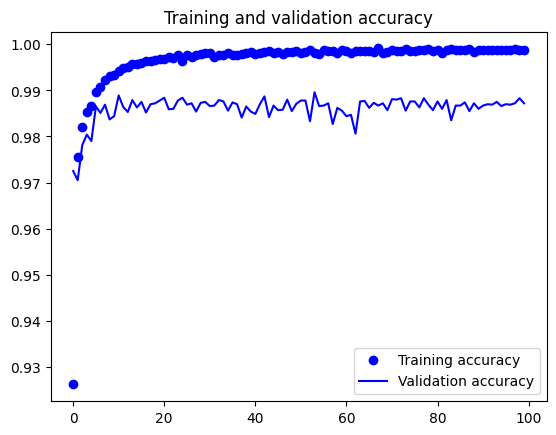

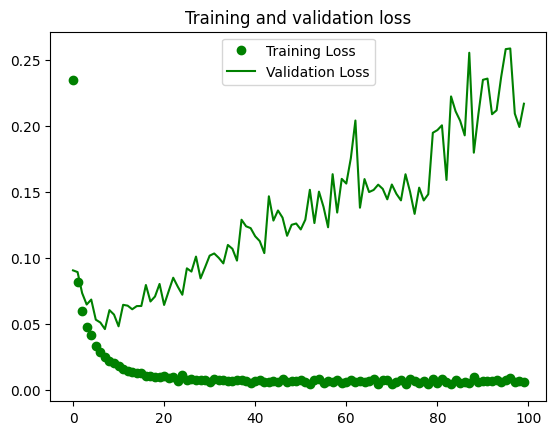

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from collections import Counter
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋 다운로드
(train_image, train_label), (test_image, test_label) = mnist.load_data()

# 데이터 셋 전처리
train_image = train_image.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_image = test_image.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

#사용된 데이터 개수 보기
print('train_image',Counter(train_label))
print('test_lable',Counter(test_label))

# CNN 모델 구성하기
model = tf.keras.models.Sequential([
  layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])

#  모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_image, train_label,  #학습 데이터
                    epochs=100,  # 학습 횟수
                    verbose=1,  # 학습과정 출력
                    validation_data=(test_image, test_label))
plt.show()

#정확도와 에러 확인하기
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



